In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [7]:
df_DMI = pd.read_csv("DMI_data.csv")
df_CO2 = pd.read_csv("Electricity_Maps_data.csv")

In [8]:
# Prepare DMI data

# Convert DateTime
df_DMI["date"] = pd.to_datetime(df_DMI["DateTime"])

# Replace comma with dot and convert to float
df_DMI["temperature"] = df_DMI["Temperatur"].str.replace(',', '.').astype(float)

# Find range of values
print(df_DMI["Temperatur"].min()) # -7,7
print(df_DMI["Temperatur"].max()) # 19.2

# Inspect data
df_DMI[:5]

-0,1
9,9


,DateTime,Temperatur,Luftfugtighed,Middelvindhastighed,Højeste vindstød,Nedbør,Sigtbarhed,date,temperature
0,3/1/2025 0:00,-1,100,1,"2,5",0,100,2025-03-01 00:00:00,-1.0
1,3/1/2025 1:00,"-1,7",100,"1,1","2,1",0,100,2025-03-01 01:00:00,-1.7
2,3/1/2025 2:00,"-1,9",100,2,"2,7",0,100,2025-03-01 02:00:00,-1.9
3,3/1/2025 3:00,"-2,3",100,"1,4","2,3",0,200,2025-03-01 03:00:00,-2.3
4,3/1/2025 4:00,"-2,6",100,"1,6","2,9",0,300,2025-03-01 04:00:00,-2.6


In [9]:
# Prepare CO2 data

# Convert DateTime
df_CO2["date"] = pd.to_datetime(df_CO2["Datetime (UTC)"])

# Rename column of interest
df_CO2 = df_CO2.rename(columns = {"Carbon intensity gCO₂eq/kWh (direct)": "carbon_intensity"})

# Only include newst data (October 2024 and newer)
df_CO2 = df_CO2[df_CO2["date"] >= '2024-10-01 00:00:00']

# Find range of values
print(df_CO2["carbon_intensity"].min()) # 12.29
print(df_CO2["carbon_intensity"].max()) # 253.59

# Inspect data
df_CO2[:5]

12.29
253.59


,Datetime (UTC),Country,Zone name,Zone id,carbon_intensity,Carbon intensity gCO₂eq/kWh (Life cycle),Carbon-free energy percentage (CFE%),Renewable energy percentage (RE%),Data source,Data estimated,Data estimation method,date
6576,2024-10-01 00:00:00,Denmark,Denmark,DK,49.19,84.23,93.27,85.68,entsoe.eu,False,NaN,2024-10-01 00:00:00
6577,2024-10-01 01:00:00,Denmark,Denmark,DK,49.38,84.90,93.17,84.98,entsoe.eu,False,NaN,2024-10-01 01:00:00
6578,2024-10-01 02:00:00,Denmark,Denmark,DK,47.20,81.59,93.45,85.31,entsoe.eu,False,NaN,2024-10-01 02:00:00
6579,2024-10-01 03:00:00,Denmark,Denmark,DK,30.32,60.95,95.44,90.10,entsoe.eu,False,NaN,2024-10-01 03:00:00
6580,2024-10-01 04:00:00,Denmark,Denmark,DK,20.13,51.56,96.67,91.16,entsoe.eu,False,NaN,2024-10-01 04:00:00


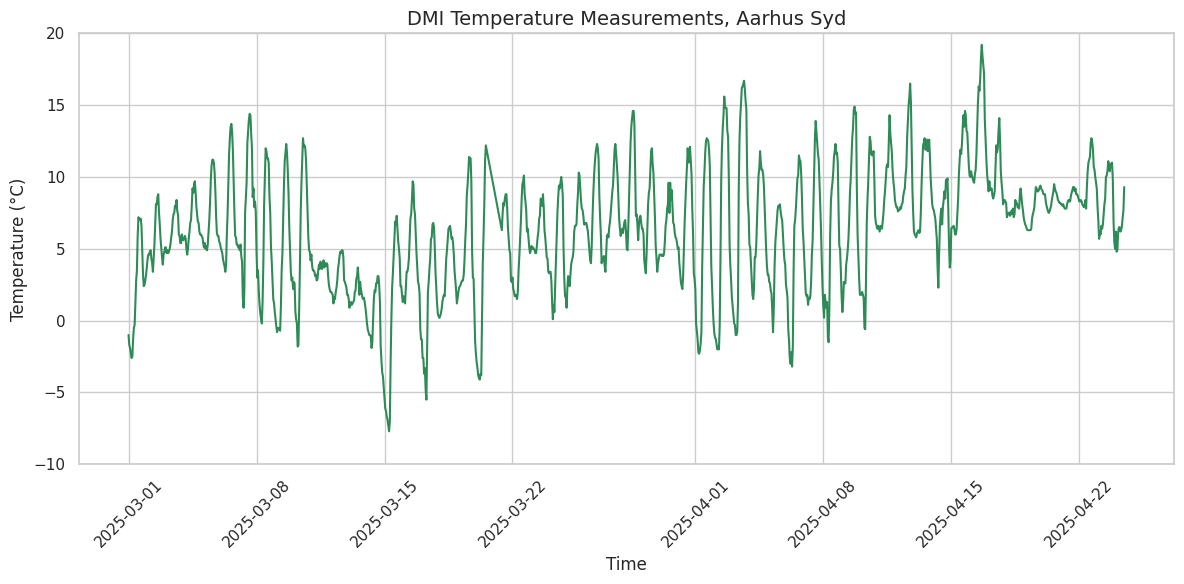

In [10]:
# Visualize DMI data

sns.set(style = "whitegrid")
plt.figure(figsize = (12, 6))

sns.lineplot(data = df_DMI, x = "date", y = "temperature", color = "seagreen")

plt.ylim(-10, 20)

plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.title("DMI Temperature Measurements, Aarhus Syd", fontsize = 14)

plt.xticks(rotation = 45)
plt.tight_layout()
plt.savefig("../plots/DMI_data_viz.png")
plt.show()

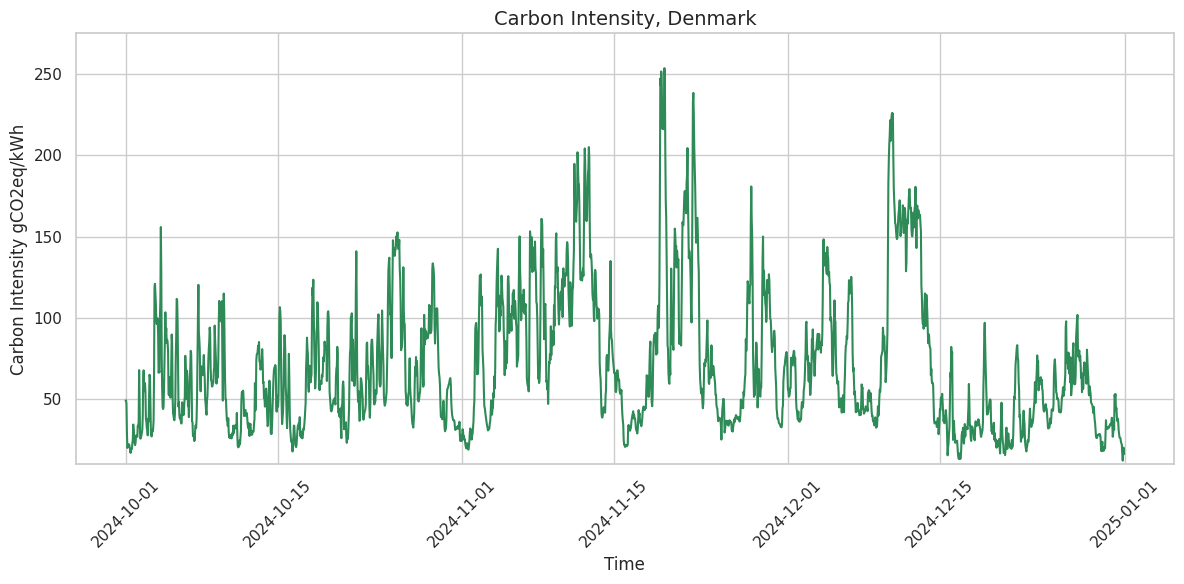

In [ ]:
# Visualize CO2 data

sns.set(style = "whitegrid")
plt.figure(figsize = (12, 6))

sns.lineplot(data = df_CO2, x = "date", y = "carbon_intensity", color = "seagreen")

plt.ylim(10, 275)

plt.xlabel("Time")
plt.ylabel("Carbon Intensity gCO2eq/kWh")
plt.title("Carbon Intensity, Denmark", fontsize = 14)

plt.xticks(rotation = 45)
plt.tight_layout()
plt.savefig("../plots/CO2_data_viz.png")
plt.show()

In [ ]:
# Resampling

# For the DMI data
daily_avg_DMI = df_DMI["temperature"].resample("D").mean() # Resample to daily mean

sns.set(style = "whitegrid") 
plt.figure(figsize = (12, 6))
sns.lineplot(data = daily_avg_DMI)
plt.title("Daily Resampled Temperature")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.tight_layout()
plt.savefig("../plots/DMI_resampled.png")
plt.show()

# For the CO2 data
daily_avg_CO2 = df_CO2["carbon_intensity"].resample("D").mean()

sns.set(style = "whitegrid") 
plt.figure(figsize = (12, 6))
sns.lineplot(data = daily_avg_CO2)
plt.title("Daily Resampled Carbon Intensity")
plt.xlabel("Time")
plt.ylabel("Carbon Intensity gCO2eq/kWh")
plt.tight_layout()
plt.savefig("../plots/CO2_resampled.png")
plt.show()

<Figure size 1200x600 with 0 Axes>

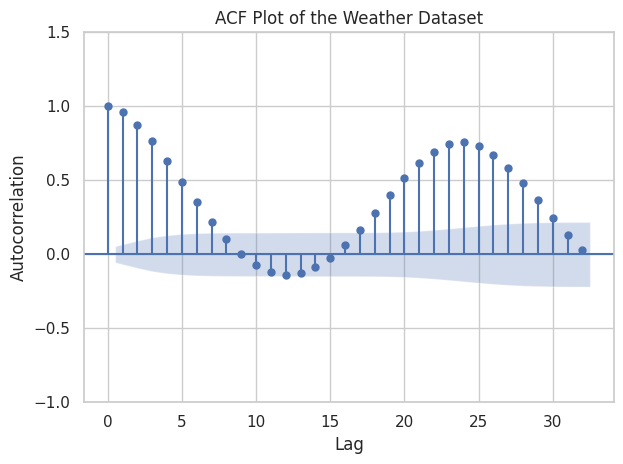

<Figure size 1200x600 with 0 Axes>

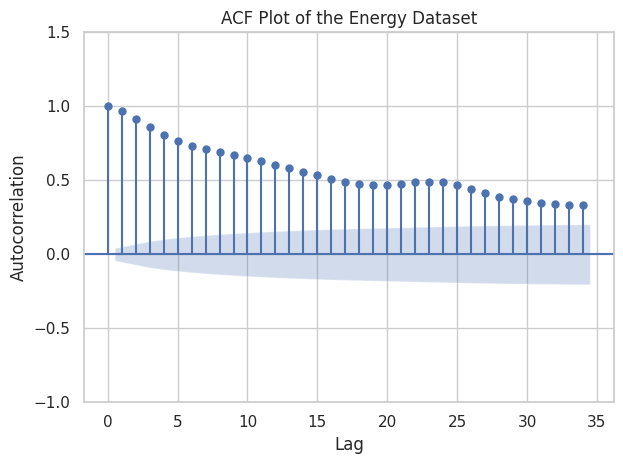

In [ ]:
# Detect seasonality w auto correlation (ACF plot)

# For the DMI data
plt.figure(figsize = (12, 6))
plot_acf(df_DMI["temperature"]) 
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("ACF Plot of the Weather Dataset")
plt.ylim(-1, 1.5)
plt.tight_layout()
plt.savefig("../plots/DMI_ACF.png")
plt.show()

# For the CO2 data
plt.figure(figsize = (12, 6))
plot_acf(df_CO2["carbon_intensity"]) 
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("ACF Plot of the Energy Dataset")
plt.ylim(-1, 1.5)
plt.tight_layout()
plt.savefig("../plots/CO2_ACF.png")
plt.show()

In [14]:
# Check for stationarity 

# For the DMI data

dmi_result = adfuller(df_DMI["temperature"])
print("DMI DATA:\n")
print(f"ADF Statistic: {dmi_result[0]:.4f}")
print(f"p-value: {dmi_result[1]:.4f}")

if dmi_result[1] < 0.05:
    print("The series is stationary\n")
else:
    print("The series is non-stationary\n")

# For the CO2 data

CO2_result = adfuller(df_CO2["carbon_intensity"])
print("CO2 DATA:\n")
print(f"ADF Statistic: {CO2_result[0]:.4f}")
print(f"p-value: {CO2_result[1]:.4f}")

if CO2_result[1] < 0.05:
    print("The series is stationary")
else:
    print("The series is non-stationary")


DMI DATA:

ADF Statistic: -2.5781
p-value: 0.0976
The series is non-stationary

CO2 DATA:

ADF Statistic: -5.2356
p-value: 0.0000
The series is stationary
